In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud

In [33]:
%matplotlib inline

In [34]:
plt.rcParams['figure.figsize'] = (10, 5)

In [35]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [36]:
# Dataset 1 (Ramen Ratings)

In [37]:
ramen_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
ramen_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [38]:
ramen_rater.sample(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
730,1970,MyOri,Malaysia Penang Red Curry Noodle,Pack,Malaysia,5,NaN
2076,624,Master Kong,Artificial Pork,Pack,China,3.75,NaN
911,1789,Cintan,Mi Segera Mmm... Perisa Ayam Cendawan,Pack,Malaysia,3.5,NaN
718,1982,Master Kong,Assorted Pork Bone Noodle,Pack,China,4.25,NaN
2500,200,Nongshim,Bowl Noodle Spicy Chicken,Bowl,United States,4.5,NaN
155,2545,KOKA,Instant Noodles Laksa Singapura Flavour,Pack,Singapore,5,NaN
69,2631,Isoyama Shoji,18 Prohibited,Pack,Japan,0,NaN
344,2356,Nongshim,Spicy Shrimp Cup Noodle,Cup,South Korea,4,NaN
288,2412,Shirakiku,Sanukiya Udon Shrimp Flavor,Pack,United States,3.25,NaN
1365,1335,Sakura Noodle,Chikara Brand Udon Hot & Spicy Flavor,Pack,United States,4,NaN


In [39]:
ramen_rater["Top Ten"].value_counts()

\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: Top Ten, dtype: int64

In [40]:
tops = ramen_rater[[type(x)is str for x in ramen_rater["Top Ten"]]]
tops[["2015" in x for x in tops["Top Ten"]]]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9
1192,1508,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5,2015 #6
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1234,1466,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5,2015 #8


In [41]:
#wordcloud plot
Text = ramen_rater['Variety'].sample(600)
Text.head()



1658                             Potato Pork Ramyun
2179                                      Soy Sauce
966                                 Laksa Singapura
1937                 2 Minute Noodles Tricky Tomato
688     Vegetarian Instant Noodles Shiitake Flavour
Name: Variety, dtype: object

In [42]:
list_of_variety = Text.to_list()



In [43]:
texts= list_of_variety[0]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviews.".format(len(texts)))

There are 18475 words in the combination of all reviews.


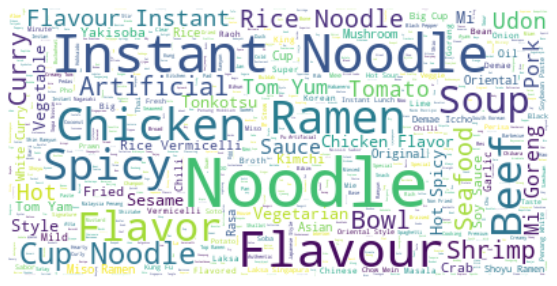

In [44]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size= 1, max_font_size=50, max_words= 1000, min_word_length=0).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [52]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [53]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [54]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

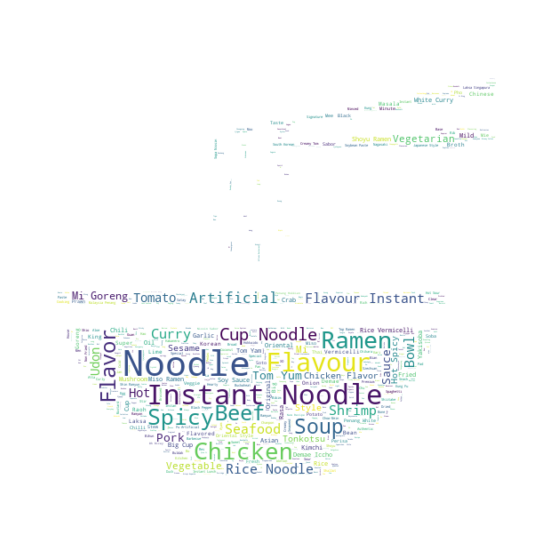

In [83]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 1, max_font_size=40, mask=transformed_bowl_mask, contour_color="red")

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [74]:
noodle_mask = np.array(Image.open("images (3).png"))
noodle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [75]:
def transform_format (val):
    if val == 0:
        return 255
    else:
        return val

In [76]:
transformed_noodle_mask = np.ndarray((noodle_mask.shape[0], noodle_mask.shape[1]), np.int32)

for i in range(len(noodle_mask)):
    transformed_noodle_mask[i] = list(map(transform_format, noodle_mask[i]))

In [77]:
transformed_noodle_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

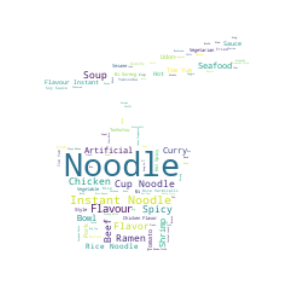

In [82]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 2, max_font_size=30, mask=transformed_noodle_mask, contour_color="red")

wc.generate(texts)

wc.to_file("images (1).png")

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [ ]:
ramen_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
ramen_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [ ]:
ramen_demands.set_index("Countries/Region", inplace=True)


In [ ]:
ramen_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


<AxesSubplot:xlabel='Countries/Region'>

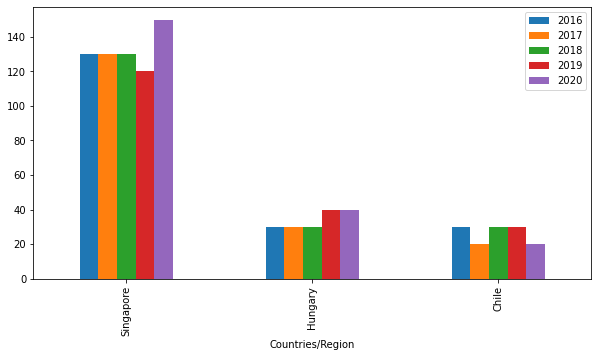

In [ ]:
group_5 =ramen_demands.sample(3)
group_5.plot(kind="bar")
